<a href="https://colab.research.google.com/github/santolina/Convolutional-Neural-Networks-in-TensorFlow/blob/master/Course_3_Week_3_Lesson_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
#!pip install tensorflow==2.0.0-beta0


tf.enable_eager_execution()

# !pip install -q tensorflow-datasets

1.15.0


In [0]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)



In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b oh yeah jenna jameson did it again yeah baby this movie rocks it was one of the 1st movies i saw of her and i have to say i feel in love with her she was great in this move br br her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing br br i hope this comment helps and u can buy the movie the storyline is awesome is very unique and i'm sure u are going to like it jenna amazed us once more and no wonder the movie won so many
b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the

In [0]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
#model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                9408      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 169,805
Trainable params: 169,805
Non-trainable params: 0
_________________________________________________________________


In [24]:
num_epochs = 50
callback = myCallback()
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final), callbacks=[callback])

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 379s 15ms/sample - loss: 0.4973 - acc: 0.7405 - val_loss: 0.3835 - val_acc: 0.8325
Epoch 2/50
25000/25000 [==============================] - 375s 15ms/sample - loss: 0.3009 - acc: 0.8794 - val_loss: 0.3535 - val_acc: 0.8443
Epoch 3/50
25000/25000 [==============================] - 374s 15ms/sample - loss: 0.2322 - acc: 0.9107 - val_loss: 0.3803 - val_acc: 0.8388
Epoch 4/50
25000/25000 [==============================] - 370s 15ms/sample - loss: 0.1772 - acc: 0.9356 - val_loss: 0.4438 - val_acc: 0.8199
Epoch 5/50
25000/25000 [==============================] - 370s 15ms/sample - loss: 0.1357 - acc: 0.9518 - val_loss: 0.5390 - val_acc: 0.8273
Epoch 6/50
25000/25000 [==============================] - 371s 15ms/sample - loss: 0.0987 - acc: 0.9667 - val_loss: 0.6081 - val_acc: 0.8189
Epoch 7/50
25000/25000 [==============================] - 376s 15ms/sample - loss: 0.0705 - acc: 0.9764 

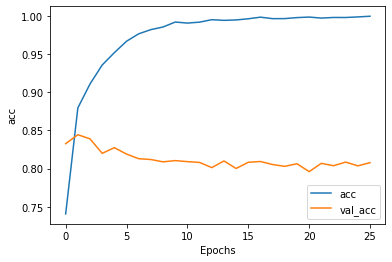

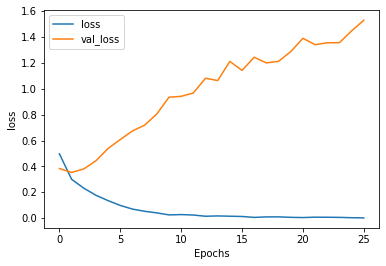

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [34]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [0]:
#num_epochs = 50
#history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

num_epochs = 50
callback = myCallback()
history2 = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final), callbacks=[callback])

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 396s 16ms/sample - loss: 0.4733 - acc: 0.7609 - val_loss: 0.3886 - val_acc: 0.8336
Epoch 2/50
 2944/25000 [==>...........................] - ETA: 4:51 - loss: 0.2796 - acc: 0.8910

In [0]:
plot_graphs(history2, 'acc')
plot_graphs(history2, 'loss')

In [30]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [32]:
#num_epochs = 50
#history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

num_epochs = 50
callback = myCallback()
history3 = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final), callbacks=[callback])

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 7s 283us/sample - loss: 0.0655 - acc: 0.9802 - val_loss: 0.7707 - val_acc: 0.8117
Epoch 2/50
25000/25000 [==============================] - 7s 284us/sample - loss: 0.0515 - acc: 0.9846 - val_loss: 0.8531 - val_acc: 0.8059
Epoch 3/50
25000/25000 [==============================] - 7s 288us/sample - loss: 0.0385 - acc: 0.9890 - val_loss: 0.9550 - val_acc: 0.8056
Epoch 4/50
25000/25000 [==============================] - 7s 285us/sample - loss: 0.0292 - acc: 0.9921 - val_loss: 1.0866 - val_acc: 0.8038
Epoch 5/50
25000/25000 [==============================] - 7s 288us/sample - loss: 0.0237 - acc: 0.9934 - val_loss: 1.1464 - val_acc: 0.8036
Epoch 6/50
25000/25000 [==============================] - 7s 287us/sample - loss: 0.0176 - acc: 0.9949 - val_loss: 1.3353 - val_acc: 0.8016
Epoch 7/50
25000/25000 [==============================] - 7s 285us/sample - loss: 0.0170 - acc: 0.9946 - val_l

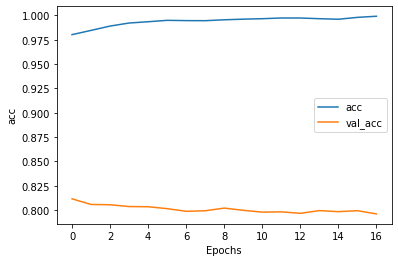

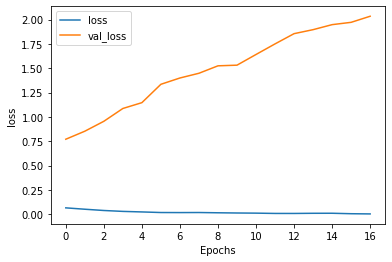

In [33]:
plot_graphs(history3, 'acc')
plot_graphs(history3, 'loss')